# Project-ITSM-Priority 

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sb
import matplotlib.pyplot as plt 


In [0]:
data = pd.read_excel("/content/train_priority(onlny proirty data).xlsx")

In [90]:
data.head(5)

,CI_Subcat,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments
0,Web Based Application,IM0000034,Closed,5,5,5,0.663615,1,KM0000401,5
1,Server Based Application,IM0000048,Closed,5,5,5,0.748361,2,KM0000524,0
2,Server Based Application,IM0000049,Closed,5,5,5,0.246183,2,KM0000592,11
3,Server Based Application,IM0000053,Closed,5,5,5,0.853722,2,KM0001104,2
4,Web Based Application,IM0000061,Closed,5,5,5,0.433426,2,KM0000603,3


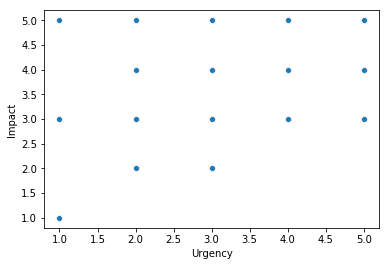

In [12]:
x=data.Urgency
y=data.Impact
sb.scatterplot(x,y)

In [91]:
w=data.groupby(data.CI_Cat)

AttributeError: ignored

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45117 entries, 0 to 45116
Data columns (total 10 columns):
CI_Subcat              45117 non-null object
Incident_ID            45117 non-null object
Status                 45117 non-null object
Impact                 45117 non-null int64
Urgency                45117 non-null int64
Priority               45117 non-null int64
number_cnt             45117 non-null float64
Category               45117 non-null int64
KB_number              45117 non-null object
No_of_Reassignments    45117 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 3.4+ MB


In [0]:
# sb.boxplot(data=data.Urgency,orient="h", palette="Set2")
sb.boxplot(data=['Impact','Priority'])

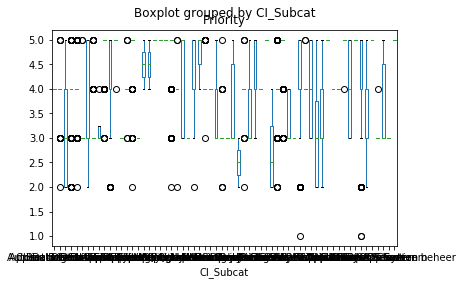

In [89]:
data.boxplot(by ='CI_Subcat', column =['Priority'], grid = False) 

In [92]:
data.describe()

,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments
count,45117.000000,45117.000000,45117.000000,45117.000000,45117.000000,45117.000000
mean,4.223486,4.224971,4.215639,0.499910,1.194516,1.141765
std,0.704808,0.704886,0.704957,0.288700,0.396448,2.285555
min,1.000000,1.000000,1.000000,0.000023,0.000000,0.000000
25%,4.000000,4.000000,4.000000,0.248783,1.000000,0.000000
50%,4.000000,4.000000,4.000000,0.500848,1.000000,0.000000
75%,5.000000,5.000000,5.000000,0.749292,1.000000,2.000000
max,5.000000,5.000000,5.000000,0.999997,2.000000,46.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45117 entries, 0 to 45116
Data columns (total 12 columns):
CI_Name                45117 non-null object
CI_Cat                 45117 non-null object
CI_Subcat              45117 non-null object
Incident_ID            45117 non-null object
Status                 45117 non-null object
Impact                 45117 non-null int64
Urgency                45117 non-null int64
Priority               45117 non-null int64
number_cnt             45117 non-null float64
Category               45117 non-null object
KB_number              45117 non-null object
No_of_Reassignments    45117 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 4.1+ MB


In [0]:
data =  data.iloc[:,1:]

In [61]:
data.head()

,CI_Subcat,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments
0,Web Based Application,IM0000034,Closed,5,5,5,0.663615,1,KM0000401,5
1,Server Based Application,IM0000048,Closed,5,5,5,0.748361,2,KM0000524,0
2,Server Based Application,IM0000049,Closed,5,5,5,0.246183,2,KM0000592,11
3,Server Based Application,IM0000053,Closed,5,5,5,0.853722,2,KM0001104,2
4,Web Based Application,IM0000061,Closed,5,5,5,0.433426,2,KM0000603,3


In [19]:
data.isnull().sum()

CI_Cat                 0
CI_Subcat              0
Incident_ID            0
Status                 0
Impact                 0
Urgency                0
Priority               0
number_cnt             0
Category               0
KB_number              0
No_of_Reassignments    0
dtype: int64

In [20]:
data.Category.head(5)

0                   incident
1    request for information
2    request for information
3    request for information
4    request for information
Name: Category, dtype: object

In [21]:
enc = LabelEncoder() # Convert category to numbers using label encoder
data.Category =  enc.fit_transform(data.Category)
data.Category.head(5)

0    1
1    2
2    2
3    2
4    2
Name: Category, dtype: int64

In [0]:
# enc = LabelEncoder() # Convert category to numbers using label encoder
# data.CI_Subcat =  enc.fit_transform(data.CI_Subcat)
# data.CI_Subcat.head(5)

In [0]:
# pd.DataFrame(data.groupby(['CI_Subcat']).mean())


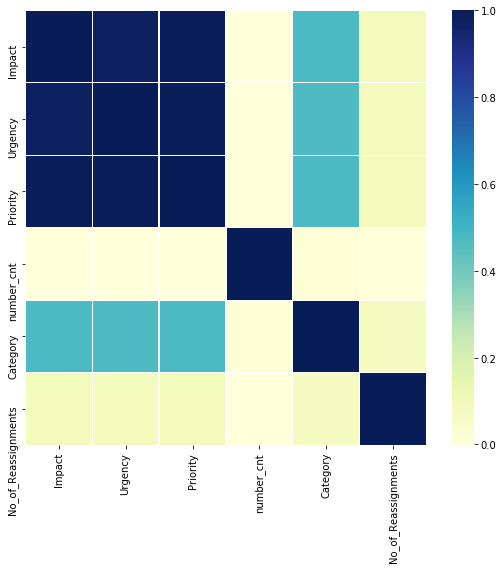

In [26]:
corrmat = data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sb.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [24]:
X = data.loc[:,['Impact','Urgency','Category']]
X.head()

,Impact,Urgency,Category
0,5,5,1
1,5,5,2
2,5,5,2
3,5,5,2
4,5,5,2


In [27]:
y = data.Priority
y.tail()

45112    2
45113    2
45114    1
45115    1
45116    1
Name: Priority, dtype: int64

In [0]:
# X.Impact.loc[X.Impact=='NS'] = data.Urgency # assign the value of urgency to impact column if the impact column = NS
# X.head()

In [0]:
# X.Urgency.loc[X.Urgency=='5 - Very Low']

In [0]:
# X.Urgency.loc[X.Urgency=='5 - Very Low'] = '5' ## assign value 5 to the records which has 5-Very Low as Urgency value

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [37]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (31581, 3)
X_test :  (13536, 3)
y_train :  (31581,)
y_test :  (13536,)


In [38]:
data.isnull().sum()

CI_Cat                 0
CI_Subcat              0
Incident_ID            0
Status                 0
Impact                 0
Urgency                0
Priority               0
number_cnt             0
Category               0
KB_number              0
No_of_Reassignments    0
dtype: int64

In [39]:
data.sort_values(by=['Impact'],axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,CI_Cat,CI_Subcat,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,No_of_Reassignments
0,application,Web Based Application,IM0000034,Closed,5,5,5,0.663615,1,KM0000401,5
11110,application,Server Based Application,IM0029842,Closed,5,5,5,0.975460,1,KM0000304,0
11112,computer,Laptop,IM0029849,Closed,5,5,5,0.193419,1,KM0001447,0
11113,computer,Laptop,IM0029850,Closed,5,5,5,0.264624,1,KM0001447,0
11114,computer,Laptop,IM0029851,Closed,5,5,5,0.817169,1,KM0001447,0


In [0]:
# model = DecisionTreeClassifier(max_depth=3,random_state=15)
# model.fit(X_train,y_train)

In [0]:
# #Visualizing
# dot_data = StringIO()
# export_graphviz(model, out_file=dot_data,  
#                 filled=True, 
#                 feature_names = X.Priority,
# #                 class_names=['setosa','versi color','virginca'],
#                 rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [42]:
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred=model.predict(X_test)

In [44]:
accuracy_score(y_pred,y_test)

1.0

In [45]:
y_pred.shape

(13536,)

In [0]:
group by clients
group by reassignment and then encode nested kind of 